In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, t, truncnorm, norm

# S 4.3

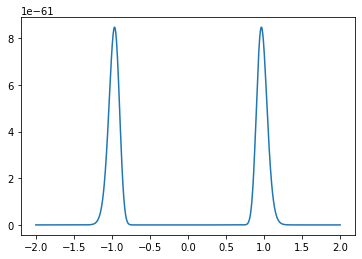

In [2]:
samples = norm.rvs(size=100)
model = lambda x, sigma: np.exp(- x**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
posterior = lambda sigma: np.prod([model(sample, sigma) for sample in samples], axis=0)
sigma = np.linspace(-2, 2, 1000)
plt.plot(sigma, posterior(sigma))
plt.show()

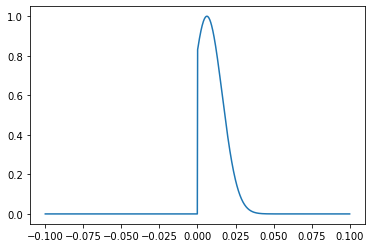

In [3]:
samples = norm.rvs(size=10000)
model = lambda x, mu: np.exp(- (x - mu)**2 / 2) / np.sqrt(2 * np.pi)
posterior = lambda mu: () * np.prod([model(sample, mu) for sample in samples], axis=0)
def posterior(mu):
    logpdf = np.zeros_like(mu)
    for sample in samples:
        logpdf += np.log(model(sample, mu))
        logpdf -= logpdf.max()
        
    return (mu > 0) * np.exp(logpdf)

mu = np.linspace(-0.1, 0.1, 1000)
plt.plot(mu, posterior(mu))
plt.show()

# Ex 1

-0.13764927798912835 0.9363579926825081


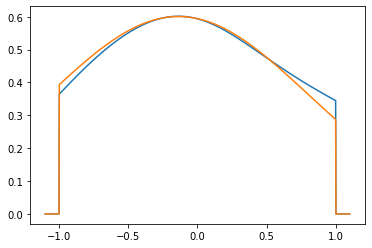

In [4]:
prior = lambda theta: (theta >= -1) * (theta <= 1)
Y = np.array([-2, -1, 0, 1.5, 2.5])
likelihood = lambda theta: np.prod([t(df=1, loc=theta).pdf(y) for y in Y], axis=0)
posterior = lambda theta: prior(theta) * likelihood(theta)

def iterate(theta0):
    weights = 1 / (1 + (Y - theta0) ** 2)
    weights /= weights.sum()
    theta1 = (weights * Y).sum()
    return theta1

mode = [Y.mean()]
for i in range(1000):
    mode.append(iterate(mode[-1]))
    
mode = mode[-1]
precision = np.sum(2 * (1 - (Y - mode) ** 2) / (1 + (Y + mode) ** 2) ** 2)
scale = np.sqrt(1 / precision)
print(mode, scale)
def tnorm(loc, scale, a, b):
    a = (a - loc) / scale
    b = (b - loc) / scale
    return truncnorm(loc=loc, scale=scale, a=a, b=b)

theta = np.linspace(-1.1, 1.1, 1000)
plt.plot(theta, posterior(theta) / (2.2 * posterior(theta).mean()))
plt.plot(theta, tnorm(loc=mode, scale=scale, a=-1, b=1).pdf(theta))
plt.show()

# Ex 15

0.49792


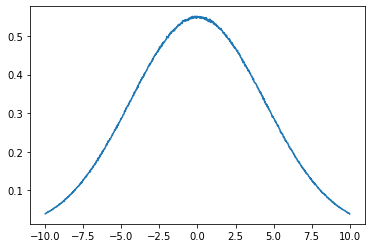

0.49990711046286634


In [5]:
Theta = norm(scale=2).rvs(size=100000)
Coverage = []
for theta in Theta:
    Y = norm(loc=theta).rvs()
    uB = 0.8 * Y + norm.ppf(0.75) * np.sqrt(0.8)
    lB = 0.8 * Y + norm.ppf(0.25) * np.sqrt(0.8)
    Flag = (uB >= theta) & (lB <= theta)
    Coverage.append(np.mean(Flag))
    
print(np.mean(Coverage))

Theta = np.linspace(-10, 10, 1000)
Coverage = []
for theta in Theta:
    Y = norm(loc=theta).rvs(100000)
    uB = 0.8 * Y + norm.ppf(0.75) * np.sqrt(0.8)
    lB = 0.8 * Y + norm.ppf(0.25) * np.sqrt(0.8)
    Flag = (uB >= theta) & (lB <= theta)
    Coverage.append(np.mean(Flag))
    
plt.plot(Theta, Coverage)
plt.show()
P = norm(scale=2).pdf(Theta) / np.sum(norm(scale=2).pdf(Theta))
print(np.sum(P * np.array(Coverage)))